### Background
In this final project, data on SC2 replays is analyzed. SC2 is a PVP RTS that pits players against each other. The matches between players are based on MMR, which sorts players into various leagues (from Bronze 1 to GM). This project seeks to gain insight into the players' attributes and hopes to predict a player's league based on the game data.
### Feature Cleaning
Pull the data into a df and take a rough look at the data. Most of the features seem to follow some very clean distributions.

In [ ]:
import pandas as pd, numpy as np
df=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/starcraft.csv")
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001193,0.000087,0.0,0.000208,57812
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936


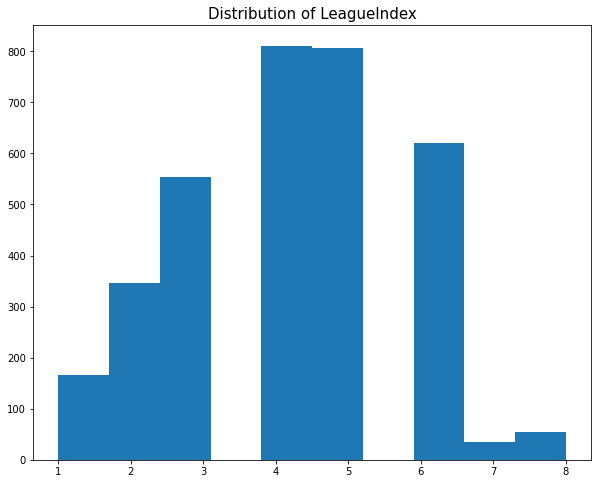

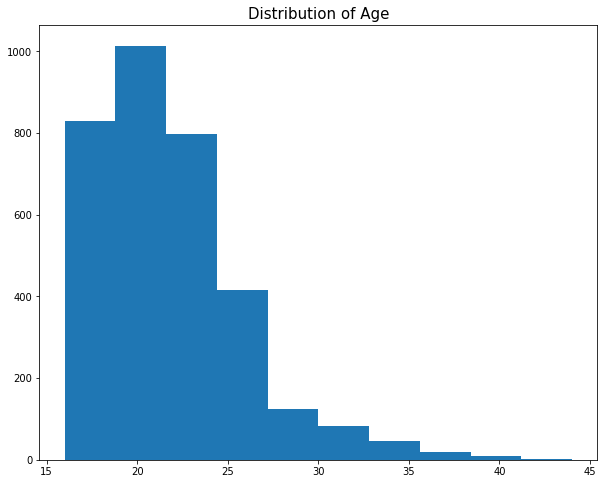

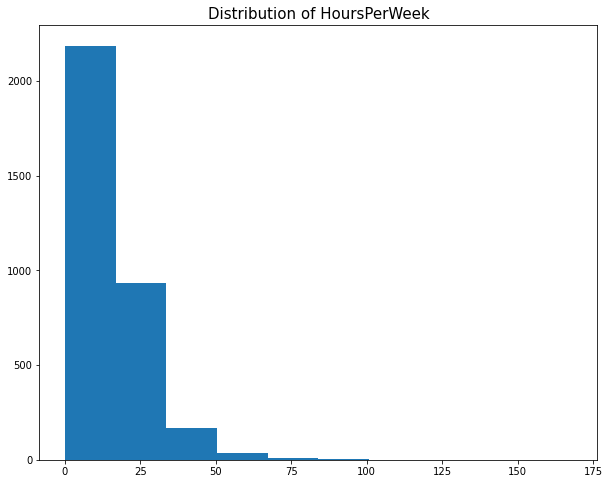

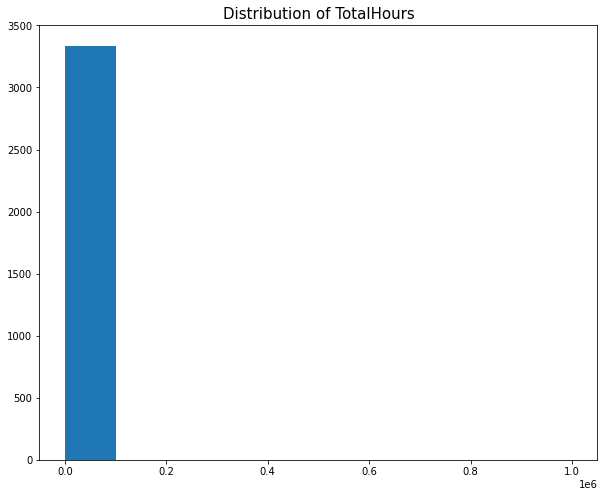

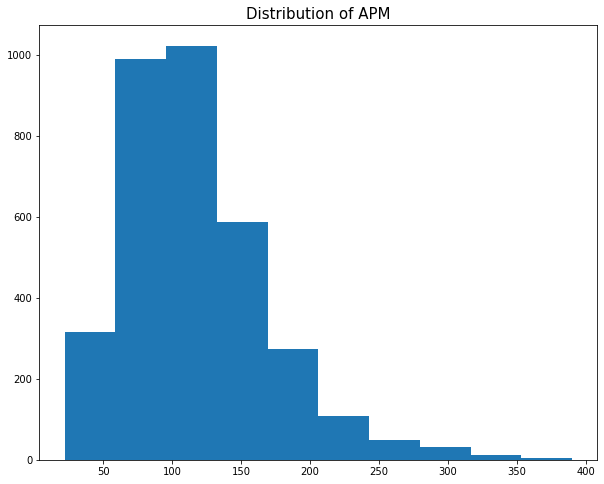

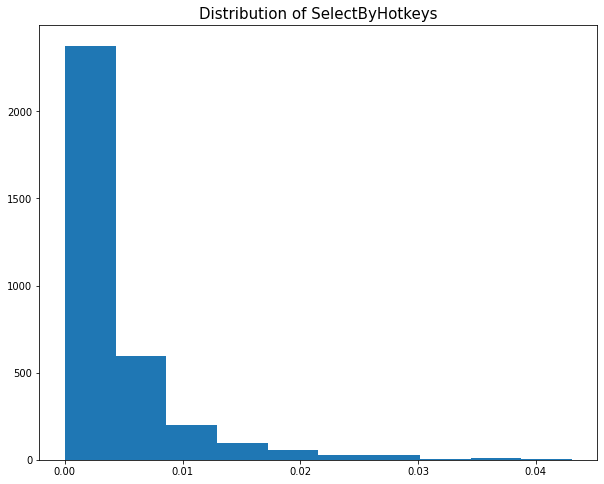

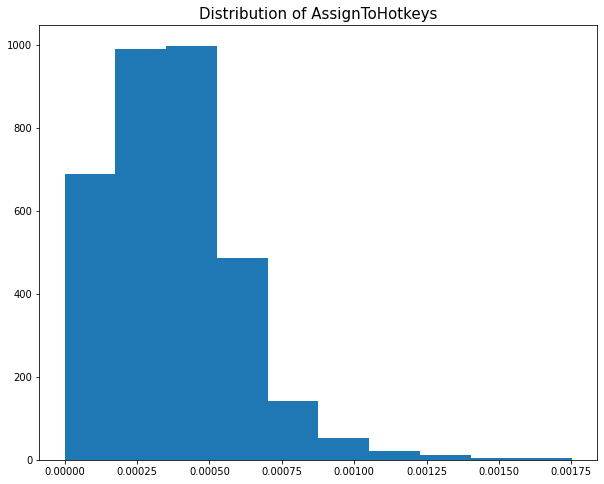

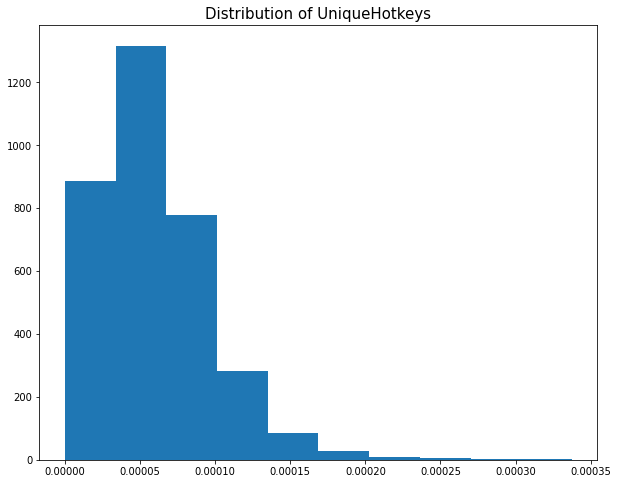

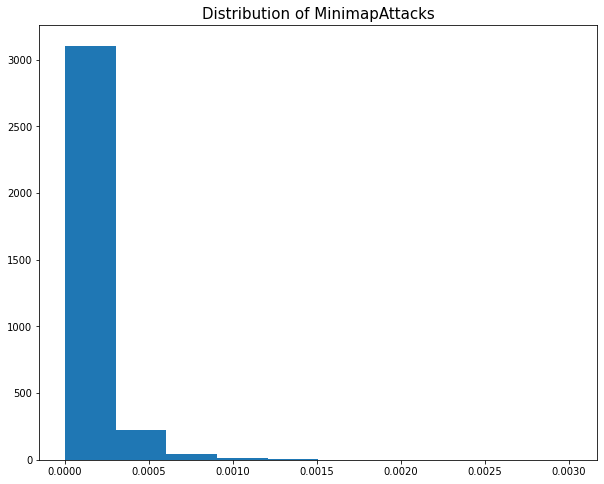

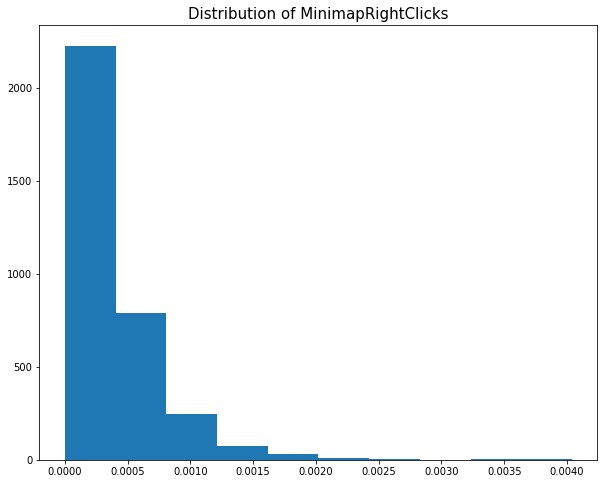

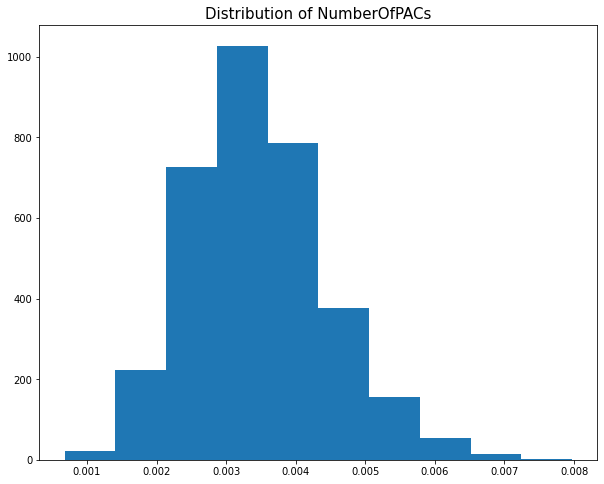

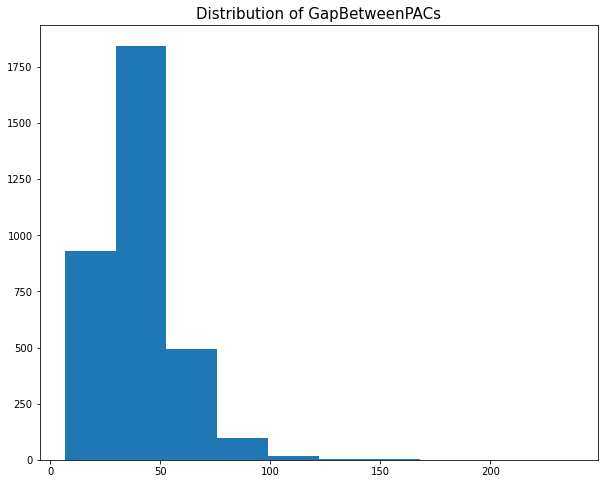

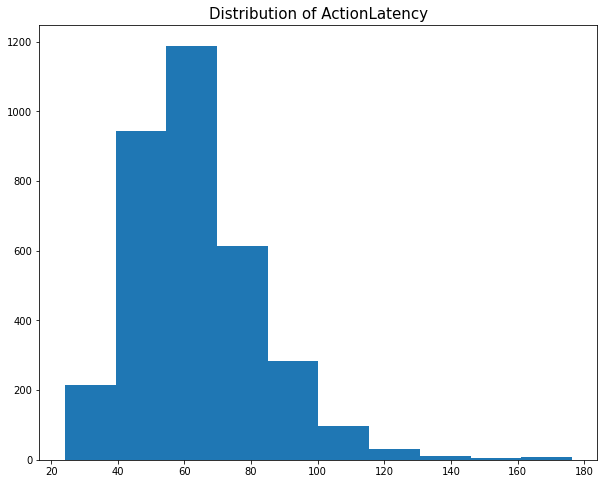

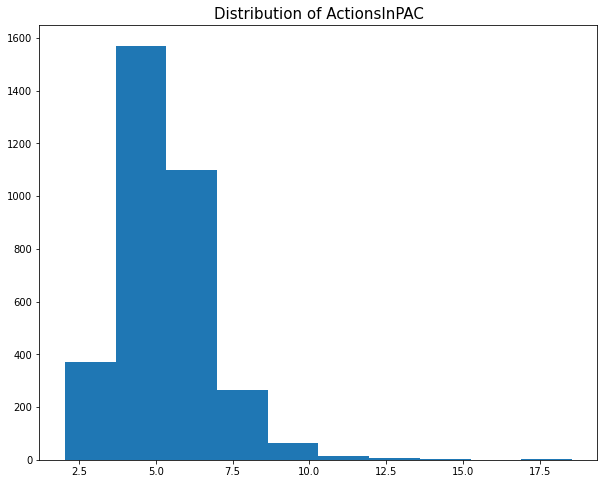

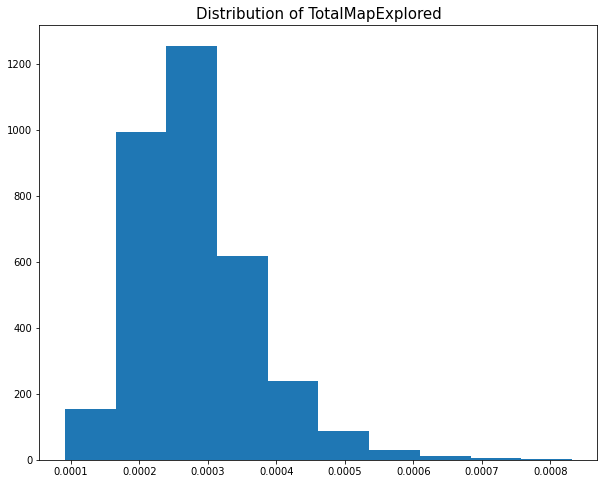

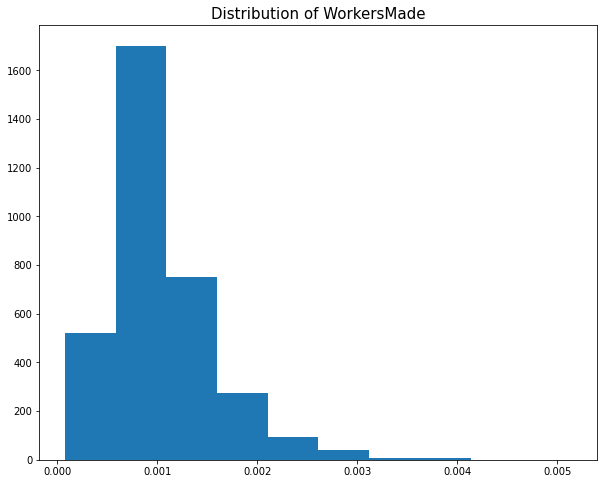

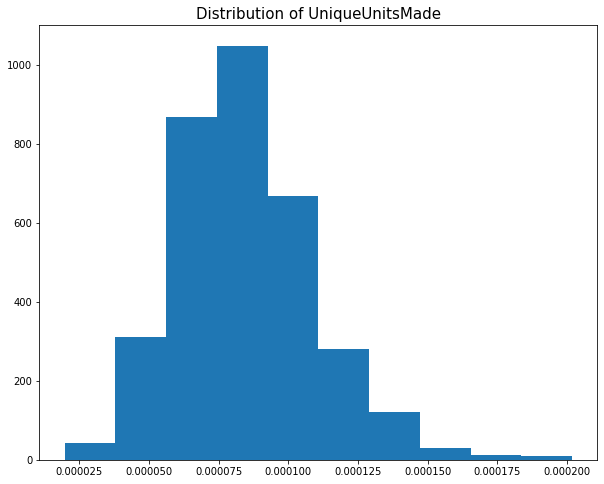

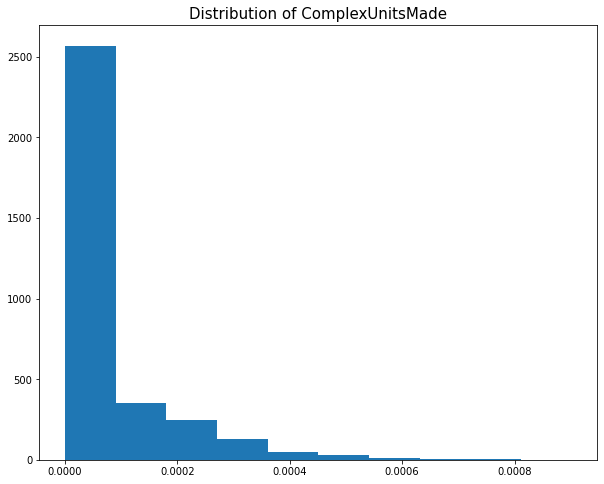

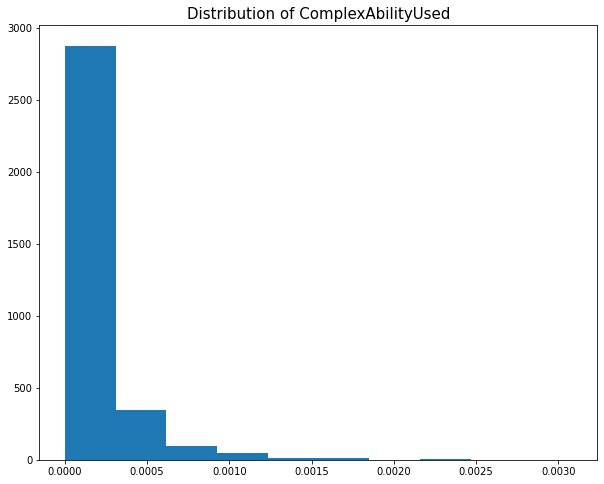

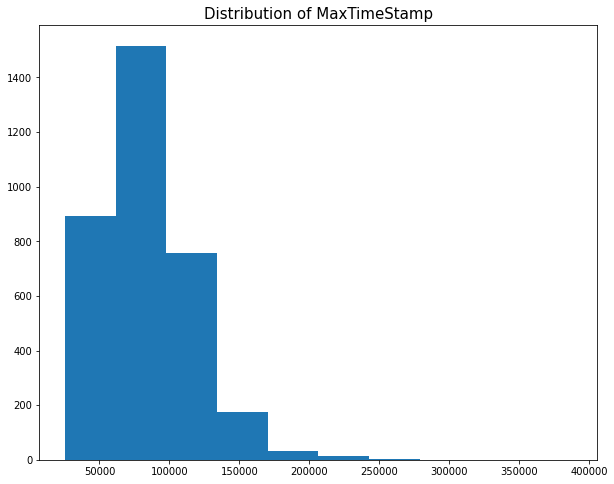

In [ ]:
import matplotlib.pyplot as plt

df.drop(columns=['GameID'],inplace=True)
for colName in df.columns:
  fig,ax=plt.subplots(figsize=(10,8))
  ax.hist(df[colName])
  ax.set_title('Distribution of '+colName,fontsize=15)

Judging from personal experience of the game, many of the aforementioned features are correlated with each other (for example, the assigning and using of hetkeys etc). Therefore, it would be prudent to check if these entries are really correlated. If so, PCA would be best to extract the most important information from the dataset.

In [ ]:
df.corr()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
LeagueIndex,1.000000,-0.127825,0.217976,0.023884,0.662309,0.490599,0.531125,0.294980,0.312543,0.233231,0.612192,-0.553246,-0.673939,0.143121,0.232982,0.295643,0.111563,0.148833,0.145733,-0.003790
Age,-0.127825,1.000000,-0.184508,-0.016630,-0.210559,-0.131177,-0.105609,-0.004513,0.043388,-0.019582,-0.197282,0.112021,0.240348,-0.045406,-0.090594,-0.092102,-0.026603,-0.080236,-0.065737,0.042930
HoursPerWeek,0.217976,-0.184508,1.000000,0.024306,0.246844,0.205785,0.158422,0.062190,0.084045,0.049424,0.174948,-0.133770,-0.188775,0.095091,0.061180,0.050623,0.031314,0.059325,0.074702,0.006740
TotalHours,0.023884,-0.016630,0.024306,1.000000,0.072850,0.081830,0.042415,0.007953,0.000874,0.007662,0.039577,-0.020644,-0.035700,0.010704,0.026362,0.014828,-0.000993,-0.007154,-0.006311,-0.004556
APM,0.662309,-0.210559,0.246844,0.072850,1.000000,0.840693,0.578416,0.320444,0.271021,0.322178,0.651237,-0.575275,-0.722402,0.383985,0.260569,0.349692,0.102066,0.136142,0.131588,-0.020038
SelectByHotkeys,0.490599,-0.131177,0.205785,0.081830,0.840693,1.000000,0.504526,0.327799,0.197158,0.143368,0.398505,-0.304290,-0.415388,0.163282,0.212857,0.141723,0.113452,0.044002,0.061038,-0.085848
AssignToHotkeys,0.531125,-0.105609,0.158422,0.042415,0.578416,0.504526,1.000000,0.340051,0.242197,0.193043,0.486729,-0.396890,-0.482190,0.093667,0.171185,0.183065,0.072920,0.144604,0.154410,0.004858
UniqueHotkeys,0.294980,-0.004513,0.062190,0.007953,0.320444,0.327799,0.340051,1.000000,0.086231,0.079627,0.129747,-0.213130,-0.196359,0.146323,0.383204,0.127259,0.387962,-0.117627,-0.090686,-0.423839
MinimapAttacks,0.312543,0.043388,0.084045,0.000874,0.271021,0.197158,0.242197,0.086231,1.000000,0.242268,0.177343,-0.237631,-0.199902,0.134803,0.033417,0.077622,-0.036824,0.040244,0.044530,0.093223
MinimapRightClicks,0.233231,-0.019582,0.049424,0.007662,0.322178,0.143368,0.193043,0.079627,0.242268,1.000000,0.176136,-0.254466,-0.230659,0.307512,0.112859,0.206594,0.063029,0.091607,0.090649,0.055443


#### PCA
There is a strong correlation between APM, LeagueIndex and between hotkey selection and APM. PCA is needed. After normalizing the dataframe and computing PCA, such that 95% of the variance is explained, 15 components are obtained

In [ ]:
df.dropna(inplace=True)

dfy=df['LeagueIndex'].copy()
# Normalize the dataframe, so that the pxa does not give too skewed results
dfn=df/df.max()

dfx=dfn.drop(columns=['LeagueIndex'])
from sklearn.decomposition import PCA
pcaMod = PCA(n_components=0.95)
pcaMod.fit(dfx)
pcaMod.explained_variance_ratio_

array([0.2963108 , 0.16162127, 0.08913619, 0.06695432, 0.06404153,
       0.05223051, 0.04372919, 0.03837509, 0.03569727, 0.03489222,
       0.0281391 , 0.02422211, 0.01912753])

In [ ]:
pcadf=pd.DataFrame(pcaMod.components_,columns=dfn.drop(columns='LeagueIndex').columns)
pcadf.head()

X = pcaMod.transform(dfx)

Using the above PCA, one can label a few of the major components.
#### First Principal Component
The first principal component has the defining feature of high correlation between APM, Hotkey usage (Assign to Hotkeys and Select Hotkeys), Number of PAC (Perception Action Cycle, ie seeing something and reacting to it) and a strong negative correlation with Action Latency and Gap Between PAC.
This supports the fact that the usage of hotkeys would make unit micromanagement easier and faster. Priliminary label of this component as unit micromanagement.
#### Second Principal Component
The most defining features of the second principal component is its correlation of Max Time Stamp (Game Length), ComplexUnitsMade (units that require long time/tech to produce and use) and negative correlation to Unique Units Made, Unique Hotkeys and Map Explored. This is known as "turtling" in the game (remain defensive and create a huge army of high tech units before finally bee-lining to opponent's base)
#### Third Principal Component
This corresponds to the affinity to spellcasting (usually relatively high tech) units vs normal units
#### Forth Principal Component
Corresponds roughly to aggressiveness: correlation of APM, Select by Hotkeys, Negative correlations of Unique Units Made, Workers Made and Map Explored (could be a timing attack?)
### K-mean
Playstyles tend to form clusters due to their similarity, K means is employed to find these clusters. The elbow method used to determine that 5 clusters would best suit the dataset. Although the "elbow" is not very pronounced.

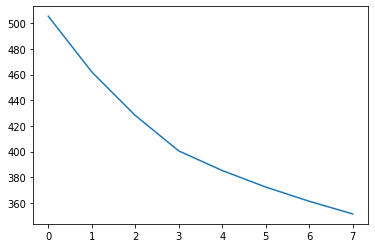

In [ ]:
from sklearn.cluster import KMeans
loss=[]
for a in range(2,10):
  km=KMeans(n_clusters=a).fit(dfx)
  loss.append(km.inertia_)
fig,ax=plt.subplots()
ax.plot(loss)

In [ ]:
km=KMeans(n_clusters=5).fit(X)
Xp=km.transform(X)
Xpp=np.concatenate([Xp,X],axis=1)

### Linear Regression
We will now perform a linear regression on the characteristics of the matches and using the league as the target. Because leagues are a stand in for skill (and continuous), the use of linear regression is somewhat appropriate however, we do need to round before computing accuracy

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
ply = PolynomialFeatures(2,interaction_only=True)
X=ply.fit_transform(Xpp)
linreg=LinearRegression()
y=dfy.values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
linreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Training loss
y_pred=np.rint(linreg.predict(x_train))
loss=y_pred-y_train
import math
sqloss=loss**2
math.sqrt(sqloss.mean())


0.9835531662763044

In [ ]:
# Testing Loss
y_pred=np.rint(linreg.predict(x_test))
loss=y_pred-y_test
import math
sqloss=loss**2
math.sqrt(sqloss.mean())

0.9970014925003393

The training and testing root-mean-square errors are similar, and they are within 1. This means that our model is performing rather well, considering that league placements in game are fluid, and players may fluctuate between leagues rather quickly.